In [1]:
# quandly for financial data
import quandl
# pandas for data manipulation
import pandas as pd

In [2]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

ModuleNotFoundError: No module named 'seaborn'

In [3]:
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'

# Retrieve TSLA data from Quandl
bitcoin = quandl.get('BCHAIN/MKTCP')
bitcoin.head(5)
# Retrieve the GM data from Quandl
#gm = quandl.get('WIKI/GM')
#gm.head(5)

,Value
Date,
2009-01-02,0.0
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0
2009-01-06,0.0


In [4]:
#Reset Date Index 
bitcoin.reset_index(inplace=True,drop=False)

In [5]:
bitcoin['Value'] = bitcoin['Value'] / 1e9
#bitcoin.head(5)

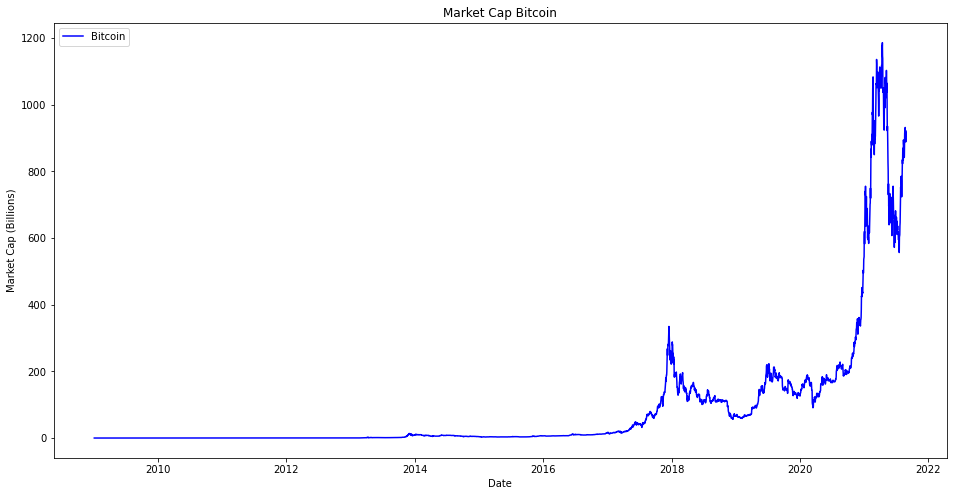

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(bitcoin['Date'], bitcoin['Value'], 'b-', label = 'Bitcoin')
plt.xlabel('Date'); plt.ylabel('Market Cap (Billions)'); plt.title('Market Cap Bitcoin')
plt.legend();

## Prophet Models

In [7]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [8]:
# Prophet requires columns ds (Date) and y (value)
bitcoin = bitcoin.rename(columns={'Date': 'ds', 'Value': 'y'})
# Put market cap in billions
bitcoin['y'] = bitcoin['y'] / 1e9

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
bitcoin_prophet = fbprophet.Prophet(daily_seasonality=True)
bitcoin_prophet.fit(bitcoin)
#,daily_seasonality=False

In [9]:
 # Make a future dataframe for 2 years
bitcoin_forecast = bitcoin_prophet.make_future_dataframe(periods=365 * 2, freq='D')

In [10]:
# Make predictions
bitcoin_forecast = bitcoin_prophet.predict(bitcoin_forecast)

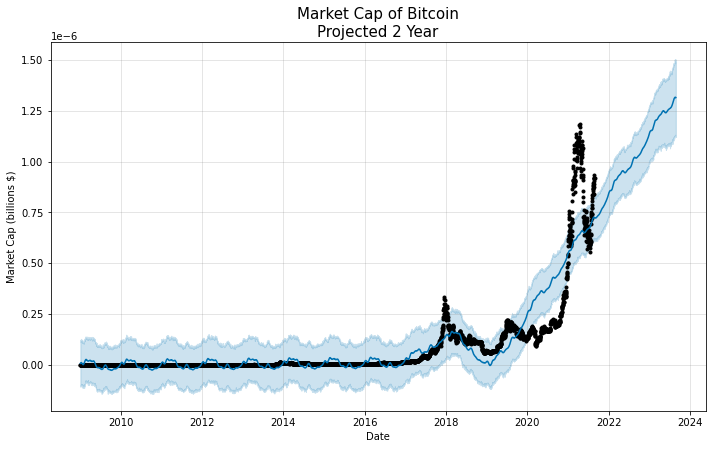

In [17]:
bitcoin_prophet.plot(bitcoin_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of Bitcoin\nProjected 2 Year',fontsize=15);